<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.526996,92.262442,61.000046,-11838.213856,-11625.424372,552.098253,-12177.522625
1,0.0,1.0,35.190013,23.167090,35.108912,-50.826235,52.639780,595.040986,-542.401206
2,0.0,2.0,29.123050,40.513250,57.969149,-440.985921,-303.380472,611.638803,-915.019275
3,0.0,3.0,58.578305,72.400357,33.311912,2399.330141,2573.620714,510.688233,2062.932481
4,0.0,4.0,22.345245,94.014339,62.212728,-9301.078786,-9112.506475,998.631144,-10111.137618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.795809,70.201540,60.111039,-6113.683746,-5895.575357,-1248.245863,-4647.329494
119996,999.0,116.0,43.338982,35.810036,36.056652,759.033487,884.239157,-577.980266,1462.219423
119997,999.0,117.0,46.851836,25.318072,32.325757,618.129471,732.625136,-706.783901,1439.409037
119998,999.0,118.0,98.283786,72.201261,84.794389,5152.529711,5417.809147,-982.702814,6400.511961


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    49.526996  92.262442  ...   552.098253 -12177.522625
      1.0    35.190013  23.167090  ...   595.040986   -542.401206
      2.0    29.123050  40.513250  ...   611.638803   -915.019275
      3.0    58.578305  72.400357  ...   510.688233   2062.932481
      4.0    22.345245  94.014339  ...   998.631144 -10111.137618
...                ...        ...  ...          ...           ...
999.0 115.0  77.795809  70.201540  ... -1248.245863  -4647.329494
      116.0  43.338982  35.810036  ...  -577.980266   1462.219423
      117.0  46.851836  25.318072  ...  -706.783901   1439.409037
      118.0  98.283786  72.201261  ...  -982.702814   6400.511961
      119.0  70.253884  83.953509  ...   -40.214889  17090.803076

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    49.526996  92.262442  ...   552.098253 -12177.522625
      1.0    35.190013  23.167090  ...   595.040986   -542.401206
      2.0    29.123050  40.513250  ...   611.638803   -915.019275
      3.0    58.578305  72.400357  ...   510.688233   2062.932481
      4.0    22.345245  94.014339  ...   998.631144 -10111.137618
...                ...        ...  ...          ...           ...
999.0 115.0  77.795809  70.201540  ... -1248.245863  -4647.329494
      116.0  43.338982  35.810036  ...  -577.980266   1462.219423
      117.0  46.851836  25.318072  ...  -706.783901   1439.409037
      118.0  98.283786  72.201261  ...  -982.702814   6400.511961
      119.0  70.253884  83.953509  ...   -40.214889  17090.803076

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.526996,92.262442,61.000046,-11838.213856,-11625.424372,552.098253,-12177.522625
1,0.0,1.0,35.190013,23.167090,35.108912,-50.826235,52.639780,595.040986,-542.401206
2,0.0,2.0,29.123050,40.513250,57.969149,-440.985921,-303.380472,611.638803,-915.019275
3,0.0,3.0,58.578305,72.400357,33.311912,2399.330141,2573.620714,510.688233,2062.932481
4,0.0,4.0,22.345245,94.014339,62.212728,-9301.078786,-9112.506475,998.631144,-10111.137618
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,77.795809,70.201540,60.111039,-6113.683746,-5895.575357,-1248.245863,-4647.329494
119996,999.0,116.0,43.338982,35.810036,36.056652,759.033487,884.239157,-577.980266,1462.219423
119997,999.0,117.0,46.851836,25.318072,32.325757,618.129471,732.625136,-706.783901,1439.409037
119998,999.0,118.0,98.283786,72.201261,84.794389,5152.529711,5417.809147,-982.702814,6400.511961


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    49.526996  92.262442  ...   552.098253 -12177.522625
      1.0    35.190013  23.167090  ...   595.040986   -542.401206
      2.0    29.123050  40.513250  ...   611.638803   -915.019275
      3.0    58.578305  72.400357  ...   510.688233   2062.932481
      4.0    22.345245  94.014339  ...   998.631144 -10111.137618
...                ...        ...  ...          ...           ...
999.0 115.0  77.795809  70.201540  ... -1248.245863  -4647.329494
      116.0  43.338982  35.810036  ...  -577.980266   1462.219423
      117.0  46.851836  25.318072  ...  -706.783901   1439.409037
      118.0  98.283786  72.201261  ...  -982.702814   6400.511961
      119.0  70.253884  83.953509  ...   -40.214889  17090.803076

[120000 rows x 7 columns]

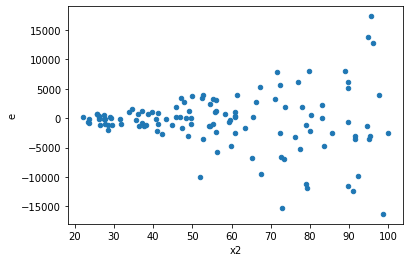

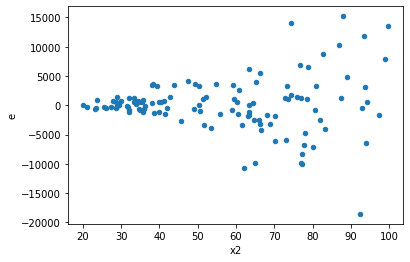

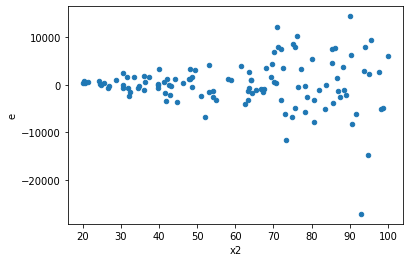

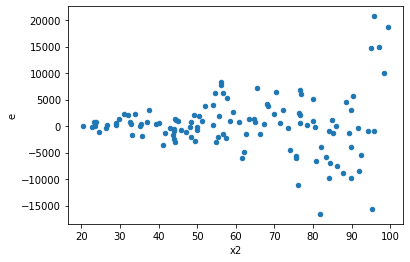

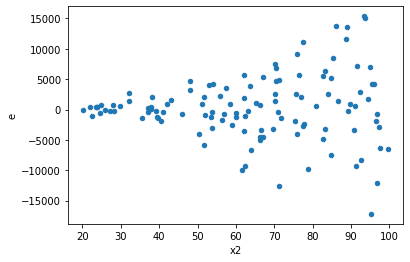

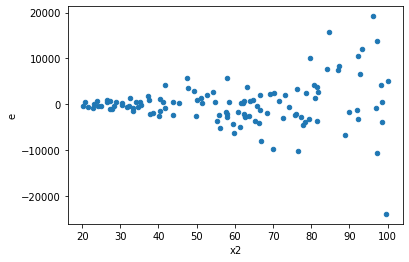

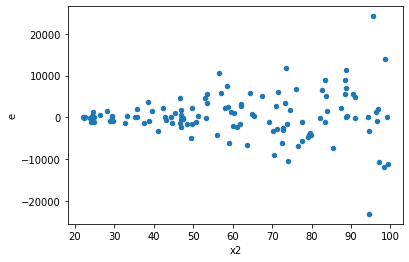

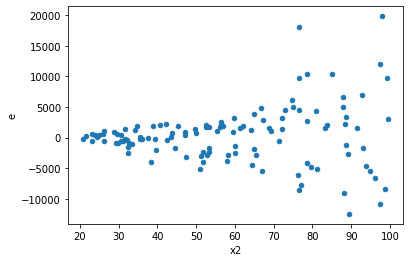

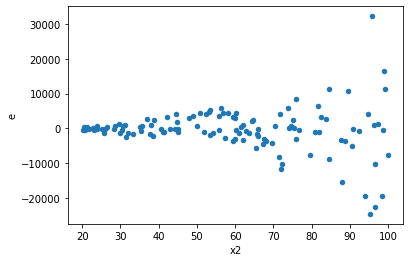

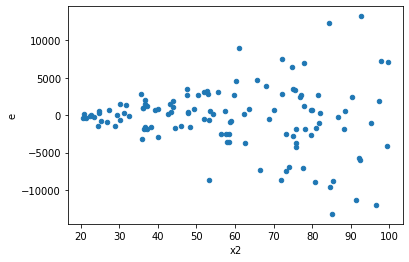

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,67.0,47.0,1401210743.5856054,1377855066.7860155,20913593.187844858,29316065.25076629,1.4017708476707396,0.2228946412146735,0.8885526793926632,0.11144732060733675,Reject005=1 : Homoscedasticity
5.0,53.0,61.0,217481241.56728038,2383410583.8538175,4103419.6522128372,39072304.65334127,9.521888562450805,2.4424906541753444e-15,0.9999999999999988,1.2212453270876722e-15,Reject005=0 : Heteroscedasticity
6.0,52.0,62.0,192706501.06816953,3231417604.429067,3705894.2513109525,52119638.78111399,14.063984357534427,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,49.0,65.0,707151760.2595606,1705695551.9145377,14431668.576725727,26241470.029454425,1.8183254340925363,0.024309167636183737,0.9878454161819081,0.012154583818091869,Reject005=0 : Heteroscedasticity
8.0,61.0,53.0,675986482.7408512,1266439273.6959095,11081745.618702479,23895080.635771878,2.1562560139843443,0.004862610958348279,0.9975686945208259,0.0024313054791741395,Reject005=0 : Heteroscedasticity
11.0,57.0,57.0,858952577.9809972,1601085523.0426226,15069343.473350829,28089219.70250215,1.8639975757521317,0.020231991574627184,0.9898840042126864,0.010115995787313592,Reject005=0 : Heteroscedasticity
14.0,64.0,50.0,1614716962.1822293,1446279593.9643574,25229952.534097333,28925591.879287146,1.146478251998108,0.6189900187235431,0.6905049906382285,0.30949500936177154,Reject005=1 : Homoscedasticity
17.0,54.0,60.0,458255795.4265857,2036763114.6765478,8486218.43382566,33946051.9112758,4.000138834038075,3.849462117955227e-07,0.9999998075268941,1.9247310589776134e-07,Reject005=0 : Heteroscedasticity
20.0,62.0,52.0,545666328.3609139,1691377947.334443,8801069.812272804,32526498.98720083,3.695743776721745,3.3594815278537027e-06,0.9999983202592361,1.6797407639268513e-06,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,59.0,55.0,1769430974.6518574,1400959043.1069694,29990355.502573855,25471982.601944897,0.8493391350348889,0.5374269885403519,Reject005=1 : Homoscedasticity
1.0,67.0,47.0,1401210743.5856054,1377855066.7860155,20913593.187844858,29316065.25076629,1.4017708476707396,0.2228946412146735,Reject005=1 : Homoscedasticity
2.0,56.0,58.0,2862425783.932714,222392460.69740155,51114746.14165561,3834352.7706448543,0.0750146104613063,3.914612057695618e-18,Reject005=0 : Heteroscedasticity
3.0,58.0,56.0,1527677697.6764786,474620061.4098829,26339270.64959446,8475358.239462195,0.3217764968595548,3.054798486288421e-05,Reject005=0 : Heteroscedasticity
4.0,56.0,58.0,2846294187.929265,511429593.2559295,50826681.927308306,8817751.607860854,0.17348666632364265,5.840302157596042e-10,Reject005=0 : Heteroscedasticity
5.0,53.0,61.0,217481241.56728038,2383410583.8538175,4103419.6522128372,39072304.65334127,9.521888562450805,2.4424906541753444e-15,Reject005=0 : Heteroscedasticity
6.0,52.0,62.0,192706501.06816953,3231417604.429067,3705894.2513109525,52119638.78111399,14.063984357534427,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,49.0,65.0,707151760.2595606,1705695551.9145377,14431668.576725727,26241470.029454425,1.8183254340925363,0.024309167636183737,Reject005=0 : Heteroscedasticity
8.0,61.0,53.0,675986482.7408512,1266439273.6959095,11081745.618702479,23895080.635771878,2.1562560139843443,0.004862610958348279,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    700
Reject005=1 : Homoscedasticity      300
Name: Result_test, dtype: int64